In [17]:
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt

In [16]:
def getam(numbins, f, x):
    # numbins = 4
    numbins = numbins + 1
    bins = np.linspace(min(f), max(f)+0.001, numbins)
    am = np.zeros((numbins, numbins))
    distm = np.zeros((numbins, numbins))
    countm = np.zeros((numbins, numbins))
    for counti, i in enumerate(f[:]):
        ibin = np.where(bins>i)[0][0]
        for countj, j in enumerate(f[counti:]):
            if counti==countj:
                continue
            jbin = np.where(bins>j)[0][0]
            countm[ibin-1, jbin-1] += 1
            distm[ibin-1, jbin-1] += abs(x[counti] - x[countj])
            am[ibin-1, jbin-1] += 1/abs(x[counti] - x[countj])

    return countm[:-1,:-1], distm[:-1,:-1], am[:-1,:-1]

In [3]:
numbins = 7

datas = os.listdir("../Crowdsource copy/crowdsource/crowdsource/csdata/data1")
dir_data = "../Crowdsource copy/crowdsource/crowdsource/csdata/data1/"+datas[200]
dir_data = '../Crowdsource copy/crowdsource/crowdsource/csdata/data1/DC22eokxf_crowdsource_rs.csv'

dir_data

'../Crowdsource copy/crowdsource/crowdsource/csdata/data1/DC22eokxf_crowdsource_rs.csv'

In [4]:
df = pd.read_csv(dir_data)
df.columns = ['index', 'x', 'y', 'flux', 'deltx', 'delty', 'chi2_', 'dx', 'dy',
       'dflux', 'qf', 'rchi2', 'fracflux', 'fluxlbs', 'dfluxlbs', 'fwhm',
       'spread_model', 'dspread_model', 'fluxiso', 'xiso', 'yiso', 'sky',
       'BADIM FLAG', 'BADFIT FLAG', 'FAILED FIT', 'FIT CHI2',
       'APERTURE RADIUS', 'QUALITY FLAG', 'STDEV FLAG', 'RELERR FLAG',
       'ref_fn', 'forced_fn', 'fn_index', 's', 'seeing', 'magzp', 'band',
       'candidate_id', 'MJD', 'resim_']

In [5]:
df = df.iloc[np.where(df.band=="g")]
df = df.iloc[np.where((df["QUALITY FLAG"]>3))]
df = df.iloc[np.where((df["QUALITY FLAG"]<6))]
df = df.iloc[np.where((df["RELERR FLAG"]==0))]
df = df.iloc[np.where((df["chi2_"]<120))]
df = df.iloc[np.where((df["magzp"]!=0))]
df = df.iloc[np.where((df["seeing"]!=0))]
#df = df.iloc[np.where(((df["flux"]/df["dflux"])<0.2))]
# dfn = dfn.iloc[np.where((dfn["seeing"]>1))]
df["normflux"] = df["flux"]*(10**((df["magzp"]-29)/2.5))
df["dnormflux"] = df["dflux"]*(10**((df["magzp"]-29)/2.5))
df = df.iloc[np.where((df["dnormflux"]/df["normflux"])<0.2)]
df = df.iloc[np.where(df["normflux"]<50000)]
df = df.sort_values("MJD")
df = df.reset_index()

In [6]:
df

,level_0,index,x,y,flux,deltx,delty,chi2_,dx,dy,...,fn_index,s,seeing,magzp,band,candidate_id,MJD,resim_,normflux,dnormflux
0,284,0,16.702758,15.522884,7750.015137,-0.138246,-0.106884,33.202772,0.407668,0.403148,...,302,15,1.286780,29.643635,g,DC22eokxf,59295.384410,[[-1.72849350e+01 1.91598282e+01 -1.39714050e...,14020.277478,2462.368698
1,269,0,15.866967,15.129282,8541.306641,-0.172963,-0.102182,31.103775,0.377937,0.366677,...,287,15,1.202713,29.639124,g,DC22eokxf,59295.388149,[[-8.05695343e+00 2.54960785e+01 -3.21421814e...,15387.710278,2511.331569
2,279,0,16.698566,15.508478,9198.387695,-0.148958,-0.101992,42.425596,0.351772,0.345523,...,297,15,1.179602,29.637720,g,DC22eokxf,59295.391910,[[-1.04088211e+01 1.11433411e+01 -4.35919952e...,16550.057765,2534.345862
3,282,0,16.899334,15.764242,7276.283691,-0.146977,-0.099910,31.438759,0.443918,0.433962,...,300,15,1.331029,29.642897,g,DC22eokxf,59295.397104,[[-1.93878937e+00 9.48197937e+00 4.38304901e...,13154.322020,2461.625427
4,281,0,16.636170,15.686310,8161.482910,-0.160474,-0.115821,55.668492,0.408855,0.405966,...,299,15,1.282140,29.642246,g,DC22eokxf,59295.400819,[[-1.44699402e+01 7.01345062e+00 6.84712982e...,14745.774394,2577.560895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,16,0,16.072450,15.065553,8711.168945,-0.171267,-0.118816,46.636224,0.368328,0.355780,...,17,15,1.149289,29.664277,g,DC22eokxf,59739.303483,[[-1.86451721e+00 1.08196106e+01 -7.00008392e...,16061.540950,2563.138885
59,39,0,16.504157,15.997713,7675.234863,-0.138864,-0.096327,33.126981,0.407702,0.409221,...,40,15,1.298733,29.677761,g,DC22eokxf,59764.181328,[[-1.81473541e+01 1.88532562e+01 1.32248688e...,14328.349092,2529.737312
60,35,0,16.206051,15.076862,8617.985352,-0.143747,-0.086272,38.093769,0.375840,0.369374,...,36,15,1.212041,29.660837,g,DC22eokxf,59764.185229,[[-2.11292343e+01 -3.53083801e+00 2.20123825e...,15839.467086,2579.094069
61,34,0,16.201482,15.469207,9310.273438,-0.151873,-0.077176,43.184339,0.347596,0.336010,...,35,15,1.161323,29.673583,g,DC22eokxf,59764.188950,[[-4.78656082e+01 1.13489380e+01 2.46657410e...,17313.924568,2618.840464


33 63


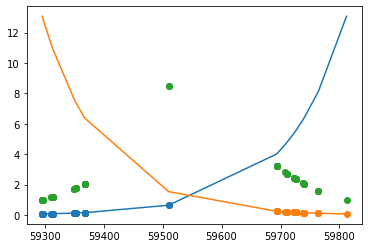

1.006249563316982


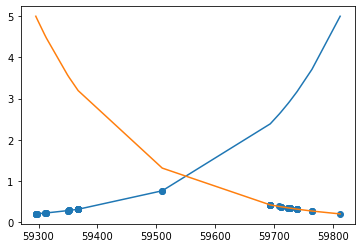

3.8082148355878247


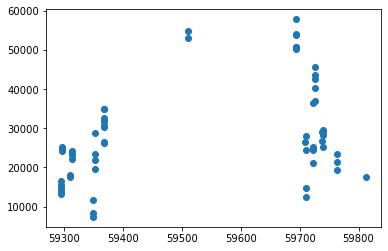

In [7]:
x = df["MJD"]
resizedx = x - np.min(x) - (np.max(x) - np.min(x))/2
#plt.plot(resizedx)
#plt.plot(x)
#plt.plot(resizedx, 1.01**resizedx)
# which = df["MJD"]
which = df["MJD"]
midind = len(resizedx)//2
midind = np.where(resizedx<0)[0][-1]
# print(resizedx[midind:])
midind = midind+1
print(midind, len(resizedx))
# plt.plot(which, 1.01**resizedx)
# plt.plot(which, 1.01**(-1*resizedx))
themodel = np.zeros(len(which))
themodel[:midind] = 1.01**resizedx[:midind]
themodel[midind:] = 1.01**(-1*resizedx)[midind:]
themodel = themodel/np.min(themodel)
plt.scatter(which[:midind], 1.01**resizedx[:midind])
plt.scatter(which[midind:], 1.01**(-1*resizedx)[midind:])
plt.plot(which, 1.01**resizedx)
plt.plot(which, 1.01**(-1*resizedx))
plt.scatter(which, themodel)
plt.show()

def myexp_model(mjd, exp, debug=False):
    x = mjd
    resizedx = x - np.min(x) - (np.max(x) - np.min(x))/2
    midind = np.where(resizedx<0)[0][-1]
    midind = midind+1
    themodel = np.zeros(len(which))
    themodel[:midind] = exp**resizedx[:midind]
    themodel[midind:] = exp**(-1*resizedx)[midind:]
    
    if debug:
        return mjd, themodel, (exp**resizedx, exp**(-1*resizedx), resizedx)
    else:
        return mjd, themodel

def get_exp(mjd, maxamp):
    x = mjd
    resizedx = x - np.min(x) - (np.max(x) - np.min(x))/2
    midind = np.where(resizedx<0)[0][-1]
    return np.exp(np.log(1/maxamp)/np.min(resizedx))
print(get_exp(df["MJD"], 5))
mjd, themodel, stuff = myexp_model(df["MJD"], get_exp(df["MJD"], 5), debug=True)
# mjd, themodel, stuff = myexp_model(df["MJD"], 1.05, debug=True)

plt.scatter(mjd, themodel)
plt.plot(mjd, stuff[0])
plt.plot(mjd, stuff[1])
plt.show()


themodel = themodel/np.min(themodel)
print(max(themodel))
plt.scatter(df["MJD"], df["normflux"]*themodel)



Text(0.5, 1.0, 'Raw Light Curve')

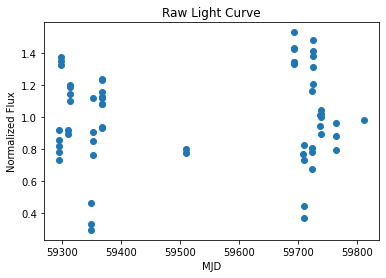

In [8]:
myt = df["MJD"]
myf = df["normflux"]/np.median(df["normflux"])
plt.scatter(myt, myf)
plt.xlabel("MJD")
plt.ylabel("Normalized Flux")
plt.title("Raw Light Curve")

/tmp/ipykernel_318720/912084953.py:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(am_not_ml))


Text(0.5, 1.0, 'Natural Log Adjacency Matrix for Raw Light Curve')

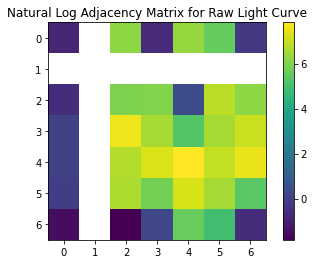

In [9]:
_, _, am_not_ml = getam(numbins, df["normflux"], df["MJD"])
plt.imshow(np.log(am_not_ml))
plt.colorbar()
plt.title("Natural Log Adjacency Matrix for Raw Light Curve")
#plt.title("Natural Log of Adjacency Matrix (values far apart)")

In [10]:
class Exponential:
    def __init__(self, mjd, flux):
        self.mjd = mjd
        self.flux = flux
#     def expmjd_model(self, exp, a=False):
#         """
#         Inject microlensing model with an exponential model given an exponent.
#         """
#         mjd = np.array(self.mjd)
#         flux = np.array(self.flux)
#         mjd, flux = zip(*sorted(zip(mjd, flux)))
#         print(mjd)
#         midind = np.where(np.sort(mjd - np.min(mjd))<((np.max(mjd) - np.min(mjd))/2))[0][-1]
#         # t1 = np.sort(mjd - np.min(mjd))
#         t1 = mjd - np.min(mjd)
#         f1 = np.zeros(len(mjd))
#         f1[:midind] = ((exp**(-1*t1[:midind])))
#         t1[:midind] = -1*(t1[:midind]) + max(t1[:midind])
#         f1[midind:] = exp**(-1*(t1[midind:] - np.min(t1[midind:])))
#         f1 = f1/min(f1)
#         if not a:
#             return t1 + np.min(mjd), f1*flux
#         else:
#             return t1 + np.min(mjd), f1*flux, f1

#     def get_exp(self, maxamp):
#         """
#         Get the exponent that will get you the max amplitude you want in your microlensing model.
#         """
#         mjd = self.mjd
#         midind = np.where(np.sort(mjd - np.min(mjd))<((np.max(mjd) - np.min(mjd))/2))[0][-1]
#         t1 = np.sort(mjd - np.min(mjd))
#         return np.exp(np.log(maxamp)/((-1*np.min(-1*(t1[midind:] - np.min(t1[midind:]))))))


    def expmjd_model(self, exp, debug=False):
        x = self.mjd
        resizedx = x - np.min(x) - (np.max(x) - np.min(x))/2
        midind = np.where(resizedx<0)[0][-1]
        midind = midind+1
        themodel = np.zeros(len(which))
        themodel[:midind] = exp**resizedx[:midind]
        themodel[midind:] = exp**(-1*resizedx)[midind:]

        if debug:
            return mjd, themodel, (exp**resizedx, exp**(-1*resizedx), resizedx)
        else:
            return mjd, themodel

    def get_exp(self, maxamp):
        x = self.mjd
        resizedx = x - np.min(x) - (np.max(x) - np.min(x))/2
        midind = np.where(resizedx<0)[0][-1]
        return np.exp(np.log(1/maxamp)/np.min(resizedx))

In [11]:
# x = df["MJD"]
# resizedx = x - np.min(x) - (np.max(x) - np.min(x))/2
# #plt.plot(resizedx)
# #plt.plot(x)
# #plt.plot(resizedx, 1.01**resizedx)
# plt.scatter(df["MJD"][:len(resizedx)//2], 1.01**resizedx[:len(resizedx)//2])
# plt.scatter(df["MJD"][len(resizedx)//2:], 1.01**(-1*resizedx)[len(resizedx)//2:])

In [12]:
maxamp = np.random.randint(3, 8)
maxamp = 7
e = Exponential(np.array(df["MJD"]), np.array(df["normflux"]))
exp = e.get_exp(maxamp)


myt, myf, _ = e.expmjd_model(exp, debug=True)

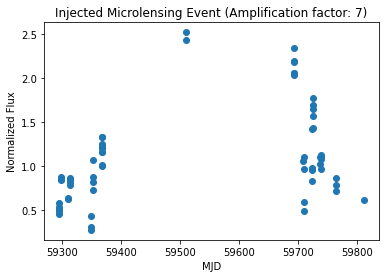

In [13]:

A = myf/np.min(myf)
plt.scatter(df["MJD"], A*df["normflux"]/np.median(A*df["normflux"]))

plt.title(f"Injected Microlensing Event (Amplification factor: {maxamp})")
plt.xlabel("MJD")
plt.ylabel("Normalized Flux")
plt.show()

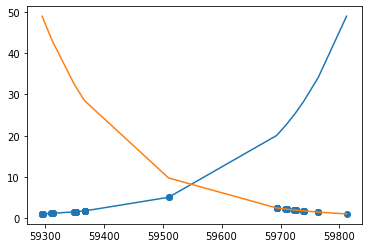

In [14]:
plt.scatter(myt, myf/np.min(myf))
plt.plot(myt, _[0]/np.min(myf))
plt.plot(myt, _[1]/np.min(myf))

/tmp/ipykernel_318720/3340631277.py:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(am_ml))


Text(0.5, 1.0, 'Natural Log of Adjacency Matrix for Injected Microlensing Event')

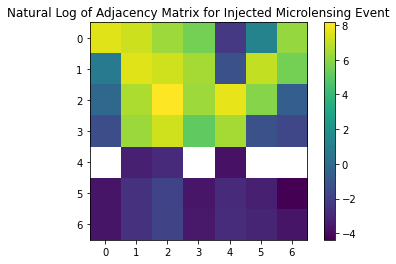

In [15]:
_, _, am_ml = getam(numbins, A*df["normflux"]/np.median(A*df["normflux"]), myt)
plt.imshow(np.log(am_ml))
plt.colorbar()
am_ml
plt.title("Natural Log of Adjacency Matrix for Injected Microlensing Event")

In [522]:
scale = np.random.randint(1000, 6000)
base = np.median(df["normflux"])
# t = np.linspace(np.min(df["MJD"]), np.max(df["MJD"]), len(df["MJD"]))
f = scale*(np.random.random(size=len(df["MJD"]))-0.5) + base
f = np.random.uniform(0, 2, len(df["MJD"]))

Text(0, 0.5, "'Flux' (Noise)")

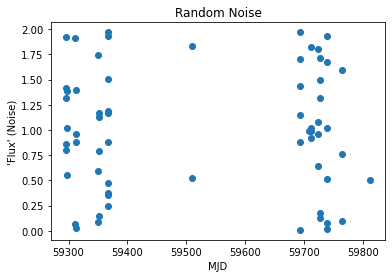

In [523]:
plt.scatter(df["MJD"], f)
plt.title("Random Noise")
plt.xlabel("MJD")
plt.ylabel("'Flux' (Noise)")

/tmp/ipykernel_2041764/382136461.py:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(am_noise))


Text(0.5, 1.0, 'Natural Log of Adjacency Matrix for Random Noise')

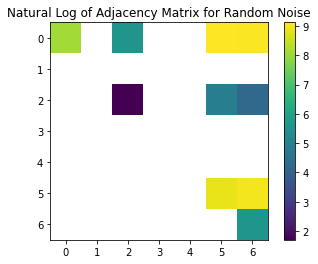

In [524]:
_, _, am_noise = getam(numbins, df["MJD"], f)
plt.imshow(np.log(am_noise))
plt.colorbar()
am_noise
plt.title("Natural Log of Adjacency Matrix for Random Noise")